In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

1.Import the Dataset

In [6]:

df = pd.read_csv('/workspaces/Laptop_Price_Predictor/data/raw/laptop_data.csv')



2.Basic Dataset Information

In [7]:
df.head()
df.shape
df.columns
df.tail()



,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
3971,4403,ASUS,ASUS Zenbook UX430UN-GV022T Laptop (14 Inch | ...,84990,Intel Core i5 (8th Gen),Intel,32 GB Expandable,8 GB,DDR4 RAM,1.6 Ghz Processor,LED,14,"Geforce MX150 GPU, 2 GB",NVIDIA,512 GB SSD Storage,No HDD,65,Upto 9 Hrs Battery Life
3972,4404,ASUS,ASUS Vivobook K15 OLED K513EA-L301WS Laptop (1...,40031,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LED,15.6,UHD,Intel,256 GB SSD Storage,No HDD,65,Upto 3 Hrs Battery Life
3973,4405,ASUS,ASUS VivoBook Pro 15 OLED M3500QC-L1711WS Lapt...,75990,AMD Octa-Core Ryzen 7,AMD,Not Expandable,16 GB,DDR4 RAM,3.1 Ghz Processor,LED,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,1024 GB SSD Storage,No HDD,120,Upto 3 Hrs Battery Life
3974,4407,ASUS,ASUS TUF FX505DT-AL118T Laptop (15.6 Inch | AM...,71909,AMD Quad-Core Ryzen 5,AMD,32 GB Expandable,8 GB,DDR4 RAM,2.1 Ghz Processor,LED,15.6,"GeForce GTX 1650 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,150,150W Adapter
3975,4408,Lenovo,Lenovo Legion 5i (82AU00CFIN) Laptop (15.6 Inc...,69990,Intel Core i5 (10th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,2.5 Ghz Processor,LED,15.6,"Geforce GTX 1650 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,60,60W Adapter


In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3976 non-null   int64 
 1   Brand            3976 non-null   object
 2   Name             3976 non-null   object
 3   Price            3976 non-null   int64 
 4   Processor_Name   3976 non-null   object
 5   Processor_Brand  3976 non-null   object
 6   RAM_Expandable   3976 non-null   object
 7   RAM              3976 non-null   object
 8   RAM_TYPE         3976 non-null   object
 9   Ghz              3976 non-null   object
 10  Display_type     3976 non-null   object
 11  Display          3976 non-null   object
 12  GPU              3968 non-null   object
 13  GPU_Brand        3972 non-null   object
 14  SSD              3976 non-null   object
 15  HDD              3976 non-null   object
 16  Adapter          3976 non-null   object
 17  Battery_Life     3558 non-null   

3.Missing Values Analysis


In [9]:
df.isnull().sum().sort_values(ascending=False)

Battery_Life       418
GPU                  8
GPU_Brand            4
Unnamed: 0           0
Brand                0
Name                 0
RAM_Expandable       0
Price                0
Processor_Name       0
Processor_Brand      0
Ghz                  0
RAM_TYPE             0
RAM                  0
Display              0
Display_type         0
SSD                  0
HDD                  0
Adapter              0
dtype: int64

In [10]:
df.isnull().mean().sort_values(ascending=False) * 100

Battery_Life       10.513078
GPU                 0.201207
GPU_Brand           0.100604
Unnamed: 0          0.000000
Brand               0.000000
Name                0.000000
RAM_Expandable      0.000000
Price               0.000000
Processor_Name      0.000000
Processor_Brand     0.000000
Ghz                 0.000000
RAM_TYPE            0.000000
RAM                 0.000000
Display             0.000000
Display_type        0.000000
SSD                 0.000000
HDD                 0.000000
Adapter             0.000000
dtype: float64

4.Drop Unnecessary Columns

In [11]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.duplicated().sum()


np.int64(4)

5.Clean and Create Useful Columns

In [12]:
df['RAM_GB'] = df['RAM'].str.extract('(\d+)').astype(int)
df['SSD_GB'] = df['SSD'].str.extract('(\d+)').astype(float)
df['Battery_Life_Hrs'] = df['Battery_Life'].str.extract(r'([\d.]+)').astype(float)


6.Visualizations

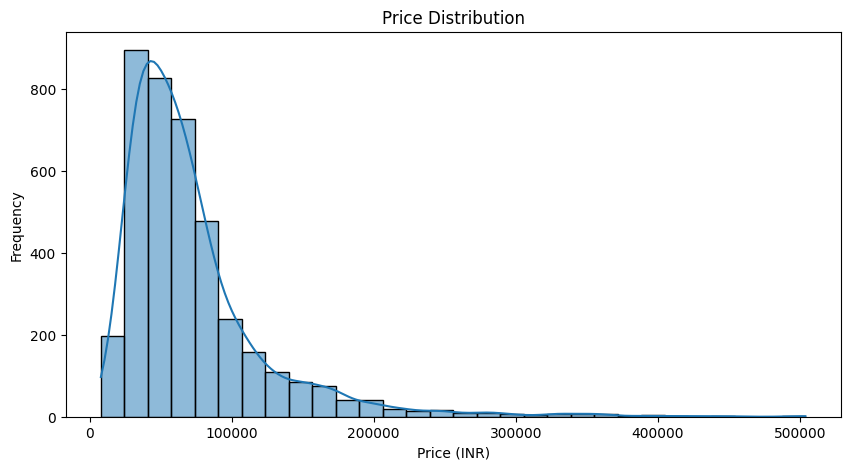

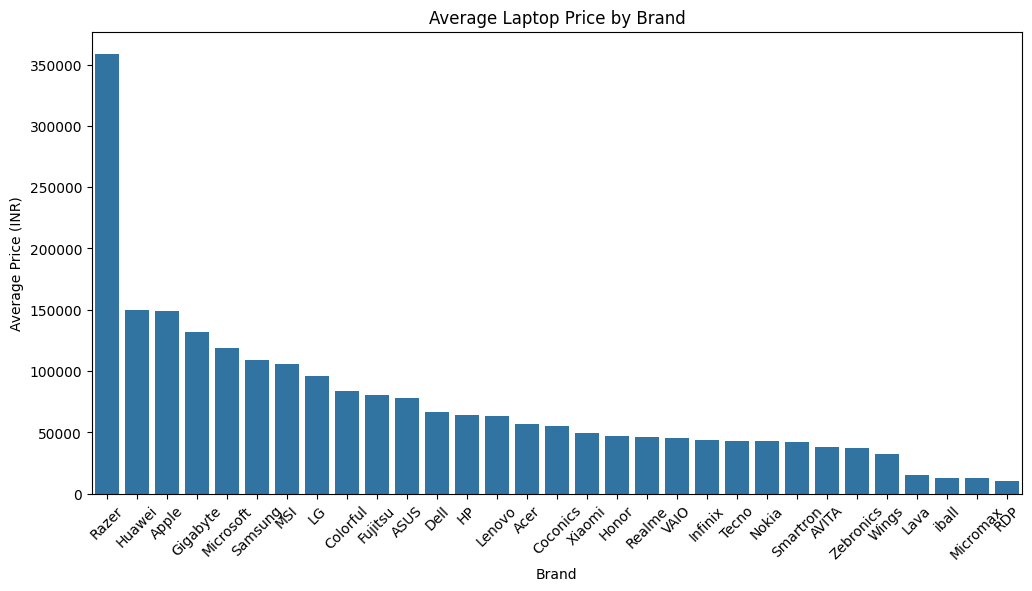

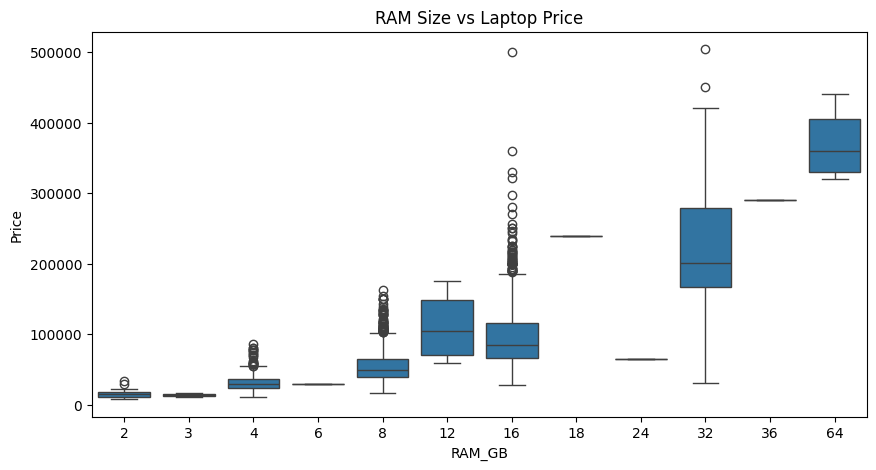

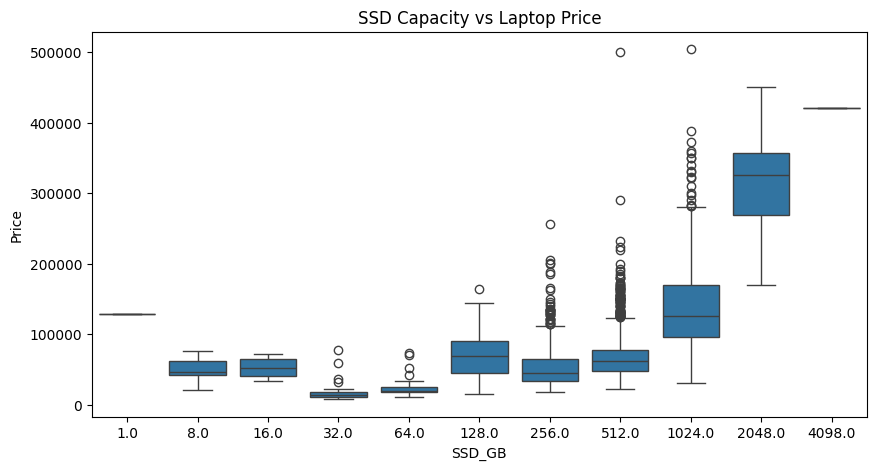

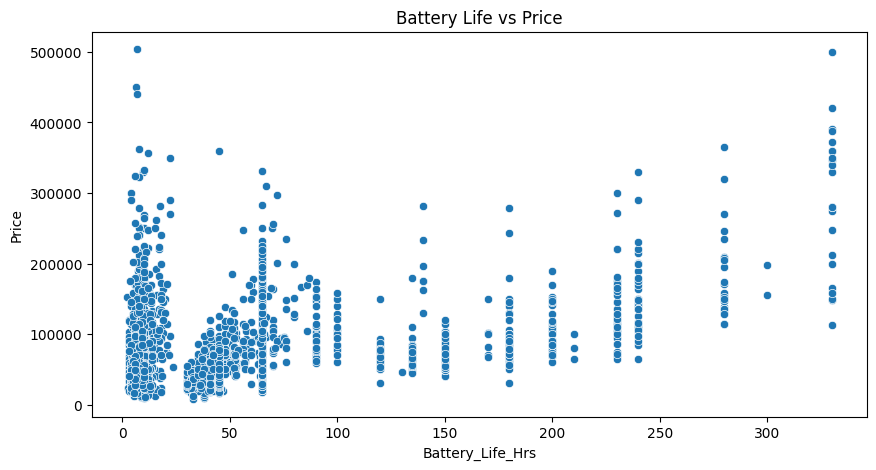

In [13]:
# Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Price Distribution')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()

# Brand-wise Avg Price
plt.figure(figsize=(12, 6))
brand_avg = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=brand_avg.index, y=brand_avg.values)
plt.xticks(rotation=45)
plt.title("Average Laptop Price by Brand")
plt.ylabel("Average Price (INR)")
plt.show()

# RAM vs Price
plt.figure(figsize=(10, 5))
sns.boxplot(x='RAM_GB', y='Price', data=df)
plt.title("RAM Size vs Laptop Price")
plt.show()

# SSD vs Price
plt.figure(figsize=(10, 5))
sns.boxplot(x='SSD_GB', y='Price', data=df)
plt.title("SSD Capacity vs Laptop Price")
plt.show()

# Battery Life vs Price
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Battery_Life_Hrs', y='Price', data=df)
plt.title("Battery Life vs Price")
plt.show()


7.Clean Final Dataset for Modeling

In [14]:
df_cleaned = df.drop(columns=['Name', 'RAM', 'SSD', 'HDD', 'Display', 'Battery_Life', 'Adapter'])

# One-hot encode categorical columns
categorical_cols = ['Brand', 'Processor_Brand', 'RAM_TYPE', 'Display_type', 'GPU_Brand']
df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

df_cleaned.head()


,Price,Processor_Name,RAM_Expandable,Ghz,GPU,RAM_GB,SSD_GB,Battery_Life_Hrs,Brand_AVITA,Brand_Acer,...,GPU_Brand_ARM,GPU_Brand_ATI,GPU_Brand_Apple,GPU_Brand_Intel,GPU_Brand_MediaTek,GPU_Brand_Microsoft,GPU_Brand_NIVIDIA,GPU_Brand_NVIDIA,GPU_Brand_Nvidia,GPU_Brand_Qualcomm
0,22990,MediaTek Octa-core,Not Expandable,2.0 Ghz Processor,Integrated Graphics,4,64.0,12.0,False,False,...,False,False,False,False,True,False,False,False,False,False
1,36289,AMD Hexa-Core Ryzen 5,12 GB Expandable,4.0 Ghz Processor,Radeon,8,512.0,11.0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,78500,Intel Core i5 (12th Gen),32 GB Expandable,3.3 Ghz Processor,"GeForce RTX 3050 GPU, 4 GB",16,512.0,10.0,False,False,...,False,False,False,False,False,False,False,True,False,False
3,55490,Intel Core i5 (12th Gen),8 GB Expandable,4.2 Ghz Processor,Iris Xe,8,512.0,7.3,False,False,...,False,False,False,True,False,False,False,False,False,False
4,21990,Intel Core i3 (11th Gen),Not Expandable,1.7 Ghz Processor,UHD,8,512.0,8.0,False,False,...,False,False,False,True,False,False,False,False,False,False


8.Save Cleaned Data

In [15]:
df_cleaned.to_csv('/workspaces/Laptop_Price_Predictor/notebooks/FC211007_Malanka/cleaned_laptop_data.csv', index=False)
